In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2023-07-04 21:17:38.927077: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Entradas
observaciones = 1000
xs = np.random.uniform(low=-10, high=10, size=(observaciones,1))
zs = np.random.uniform(-10, 10, (observaciones,1))

inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observaciones,1))
targets = 2*xs - 3*zs + 5 + noise
print(targets.shape)

np.savez('TF_intro', inputs=inputs, targets=targets)

(1000, 1)


In [4]:
training_data = np.load('TF_intro.npz')

In [5]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size)
])

model.compile(optimizer='sgd', loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - loss: 33.3903 - 285ms/epoch - 9ms/step
Epoch 2/100
32/32 - 0s - loss: 4.4299 - 14ms/epoch - 449us/step
Epoch 3/100
32/32 - 0s - loss: 1.4578 - 16ms/epoch - 501us/step
Epoch 4/100
32/32 - 0s - loss: 0.6419 - 16ms/epoch - 495us/step
Epoch 5/100
32/32 - 0s - loss: 0.4184 - 16ms/epoch - 492us/step
Epoch 6/100
32/32 - 0s - loss: 0.3575 - 16ms/epoch - 489us/step
Epoch 7/100
32/32 - 0s - loss: 0.3429 - 16ms/epoch - 499us/step
Epoch 8/100
32/32 - 0s - loss: 0.3391 - 15ms/epoch - 475us/step
Epoch 9/100
32/32 - 0s - loss: 0.3363 - 16ms/epoch - 495us/step
Epoch 10/100
32/32 - 0s - loss: 0.3343 - 15ms/epoch - 467us/step
Epoch 11/100
32/32 - 0s - loss: 0.3401 - 16ms/epoch - 494us/step
Epoch 12/100
32/32 - 0s - loss: 0.3355 - 15ms/epoch - 479us/step
Epoch 13/100
32/32 - 0s - loss: 0.3417 - 15ms/epoch - 471us/step
Epoch 14/100
32/32 - 0s - loss: 0.3403 - 15ms/epoch - 463us/step
Epoch 15/100
32/32 - 0s - loss: 0.3358 - 16ms/epoch - 485us/step
Epoch 16/100
32/32 - 0s - loss: 0.

In [6]:
model.layers[0].get_weights()

[array([[ 2.0216362],
        [-3.0096579]], dtype=float32),
 array([4.9994435], dtype=float32)]

In [7]:
model.predict_on_batch(training_data['inputs']).round(1)

2023-07-04 21:29:04.180828: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1000,2]
	 [[{{node Placeholder/_0}}]]


array([[-17.1],
       [-21.1],
       [ 28.8],
       [-19.9],
       [ 30. ],
       [ 32.1],
       [ -0.2],
       [ 27.8],
       [ 14.1],
       [-28.9],
       [  1.7],
       [-12.5],
       [-20.3],
       [-11.2],
       [  9.2],
       [  0.4],
       [ 31.1],
       [-14.9],
       [ 16.4],
       [  5.8],
       [ 53.9],
       [-15.9],
       [ 25. ],
       [ 44.7],
       [-21.8],
       [ 29.3],
       [ 10. ],
       [ 13.4],
       [-22.1],
       [ 15.3],
       [-26.5],
       [  7.6],
       [ -8.5],
       [-18.3],
       [ 11.8],
       [-21.7],
       [ -9.3],
       [ 11. ],
       [ 26.5],
       [  8.2],
       [ 22.6],
       [ -8.2],
       [ -6.5],
       [ -6.2],
       [ 30.3],
       [ -5.5],
       [-16.1],
       [-37. ],
       [ -8.9],
       [-29.9],
       [ 44.3],
       [-18.7],
       [ 27.9],
       [ 16.4],
       [-21.5],
       [ -4.1],
       [  5.4],
       [ 40.6],
       [ 26.4],
       [-10. ],
       [  0.8],
       [ -4.2],
       [

2023-07-04 21:29:45.528097: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [1000,2]
	 [[{{node Placeholder/_0}}]]


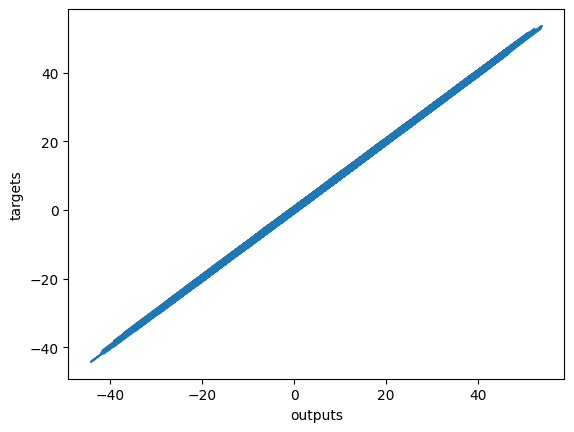

In [8]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()